In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys
sys.path.append('/Users/wastechs/Documents/git-repos/energy-efficiency')
from lib.util.helper import query_table, weekday_time_series
from lib import visualizer
import seaborn as sns
import plotly.express as px
from statsmodels.graphics.tsaplots import plot_acf

In [3]:
#df_1T = query_table(table='entsorgung_30T')
ent_week = weekday_time_series(sensor_id='entsorgung_1T')
ent_week['kw'] = round(ent_week['kw'], 2)
ent_week['kw'] = ent_week['kw'].apply(lambda x: 0.0 if x == -0.0 else x)
ent_week['log_kw'] = np.log(ent_week['kw'])

Text(0.5, 1.0, 'Paper Disposal Machine')

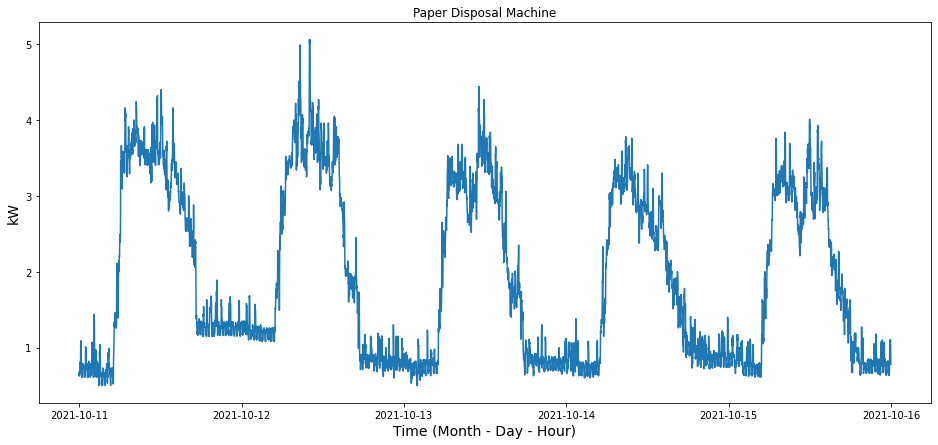

In [5]:
plt.figure(figsize=(16, 7))
plt.plot(ent_week.index, ent_week.kw)
plt.xlabel('Time (Month - Day - Hour)', size=14)
plt.ylabel('kW', size=14)
plt.title('Paper Disposal Machine')

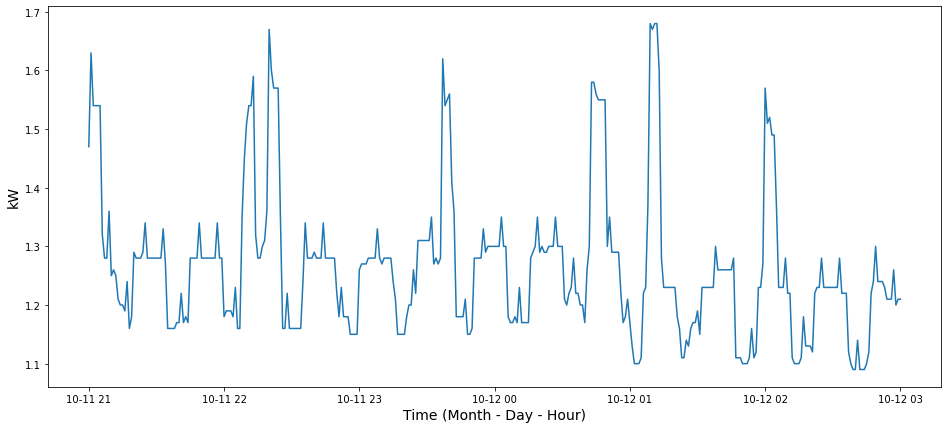

In [12]:
plt.figure(figsize=(16, 7))

plt.plot(
    ent_week['2021-10-11 21:00': '2021-10-12 03:00'].index,
    ent_week['2021-10-11 21:00': '2021-10-12 03:00']['kw']
    )
plt.ylabel('kW', fontsize=14)
plt.xlabel('Time (Month - Day - Hour)', fontsize=14)
plt.show()

In [24]:
time_int_range = np.arange(0, 720*10, 10)
ent_week['t'] = time_int_range
ent_week['t_scaled'] = (ent_week['t'] - ent_week['t'].min()) / (ent_week['t'].max() - ent_week['t'].min())

In [25]:
px.line(
    x=ent_week['t_scaled'], y=ent_week.kw, 
    title='Entsorgung',
    labels={
        'x': 'Time',
        'y': 'kW'
    })

Text(0.5, 1.0, 'Correlogram: Autocorrelation Coefficient')

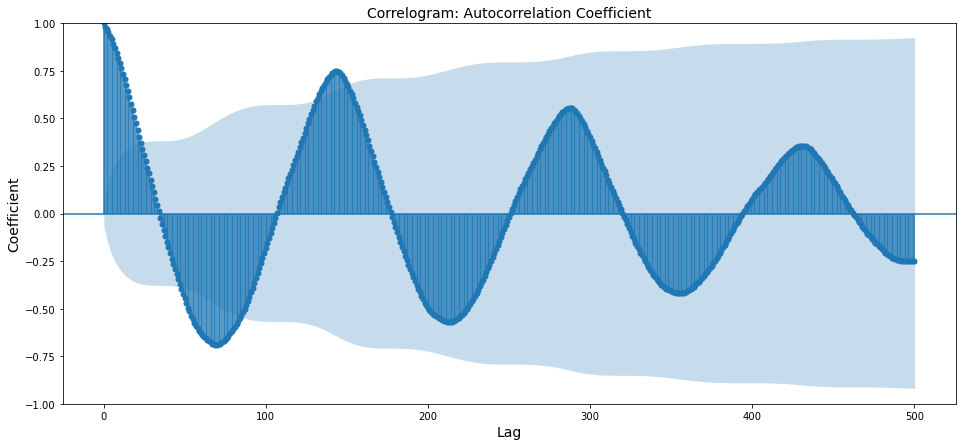

In [29]:
fig, ax = plt.subplots(figsize=(16, 7))
plot_acf(ent_week.kw.values.squeeze(), lags=500, ax=ax)
plt.xlabel('Lag', fontsize=14)
plt.ylabel('Coefficient', fontsize=14)
plt.title('Correlogram: Autocorrelation Coefficient', fontsize=14)

In [ ]:
# Short term interval
ent_week['t_scaled'].iloc[125], ent_week['t_scaled'].iloc[150]

(0.08686587908269632, 0.10423905489923559)

In [ ]:
# Long term interval
ent_week['t_scaled'].iloc[260], ent_week['t_scaled'].iloc[300]

(0.18068102849200834, 0.20847810979847117)

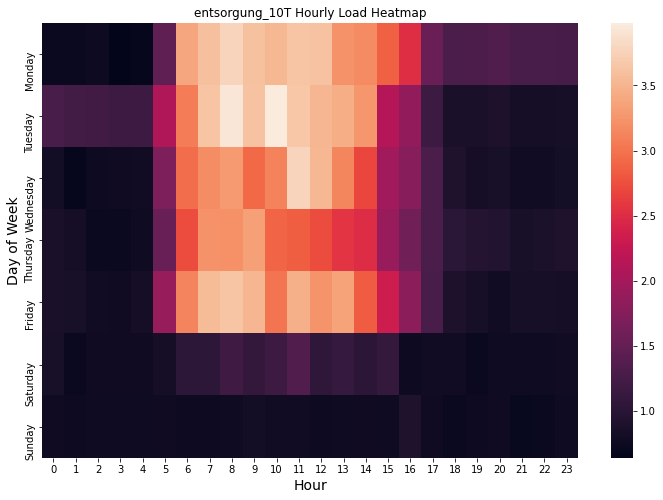

In [ ]:
visualizer.hourly_profile_heatmap(machine='entsorgung_10T')